# Logistic regression 

In [34]:
# importing libs
# ref  https://www.kaggle.com/code/kostasmar/exploring-the-iris-data-set-scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline

In [35]:
path = ''
# read csv using pandas
iris_df = pd.read_csv(path+"Iris.csv")
# check the head of dataframe
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# check the data types
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [37]:
iris_df.shape

(150, 6)

In [38]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [40]:
# check value counts of Cut column
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [41]:
iri_df = iris_df.drop_duplicates(subset ="Species",) 

In [42]:
import plotly.express as px
#visualize distribution interactive
species_counts = iris_df['Species'].value_counts()
fig = px.bar(x=species_counts.index, y=species_counts.values)
fig.show()

In [43]:
# cross tab of Cut and Color
# see the relationship between two 
# or more categorical variables, such as how the frequency of one variable is related to another variable.
pd.crosstab(index=iris_df['Species'], columns=iris_df['SepalWidthCm'])

SepalWidthCm,2.0,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,...,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4
Species,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,0,0,1,0,0,0,0,0,1,6,...,9,6,2,3,4,2,1,1,1,1
Iris-versicolor,1,2,3,3,4,3,5,6,7,8,...,1,0,0,0,0,0,0,0,0,0
Iris-virginica,0,1,0,0,4,2,4,8,2,12,...,2,0,1,0,2,0,0,0,0,0


Crosstab function in pandas is a table that shows the frequency distribution of two or more categorical variables. Each row of the table represents a unique category in one of the variables, and each column represents a unique category in the other variable.

`pivot_table()` is a function in Pandas that creates pivot tables, which are similar to cross-tabulation tables but with more flexibility. 

In [44]:
# create pivot table
pd.pivot_table(iris_df, values='SepalWidthCm', index='Species', columns='SepalLengthCm', aggfunc=np.mean)

SepalLengthCm,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
Species,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,3.0,3.033333,2.3,3.325,3.2,3.18,3.075,3.3625,3.6,3.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iris-versicolor,NaN,NaN,NaN,NaN,NaN,NaN,2.400,2.1500,2.5,2.700000,...,2.8,3.100000,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iris-virginica,NaN,NaN,NaN,NaN,NaN,NaN,2.500,NaN,NaN,NaN,...,3.1,3.133333,NaN,3.0,3.266667,2.9,2.8,3.0,3.05,3.8


Pivot table is good when you want to summarize and compare the numerical data across multiple variables in a table format. The function allows you to aggregate the data using various functions (such as mean,sum, count etc.)

In [46]:
# Encode the dependent variable manually
def f(x):
    if x == 'Iris-setosa':
        val = 0
    elif x == 'Iris-virginica':
        val = 1
    else:
        val = 2
    return val

iris_df['type'] = iris_df['Species'].apply(f)

In [47]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,type
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


In [48]:
#or encode the data by applying get_dummies function
df_encoded = pd.get_dummies(iris_df["Species"])
df_encoded

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


Comparing Sepal Length and Sepal Width

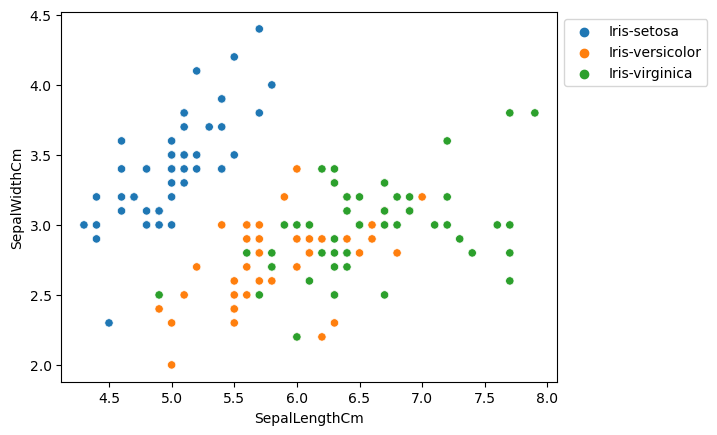

In [49]:
#Plot using sns
# importing packages 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
  
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', 
                hue='Species', data=iris_df, ) 
  
# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()

- Species Setosa has smaller sepal lengths but larger sepal widths.

- Versicolor Species lies in the middle of the other two species in terms of sepal length and width

- Species Virginica has larger sepal lengths but smaller sepal widths.

 Comparing Petal Length and Petal Width

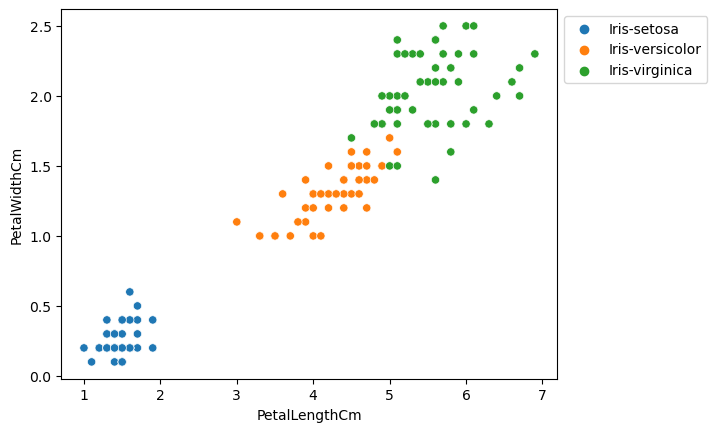

In [50]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', 
                hue='Species', data=iris_df, ) 
  
# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()

Plot all the column's relationships using pairplot

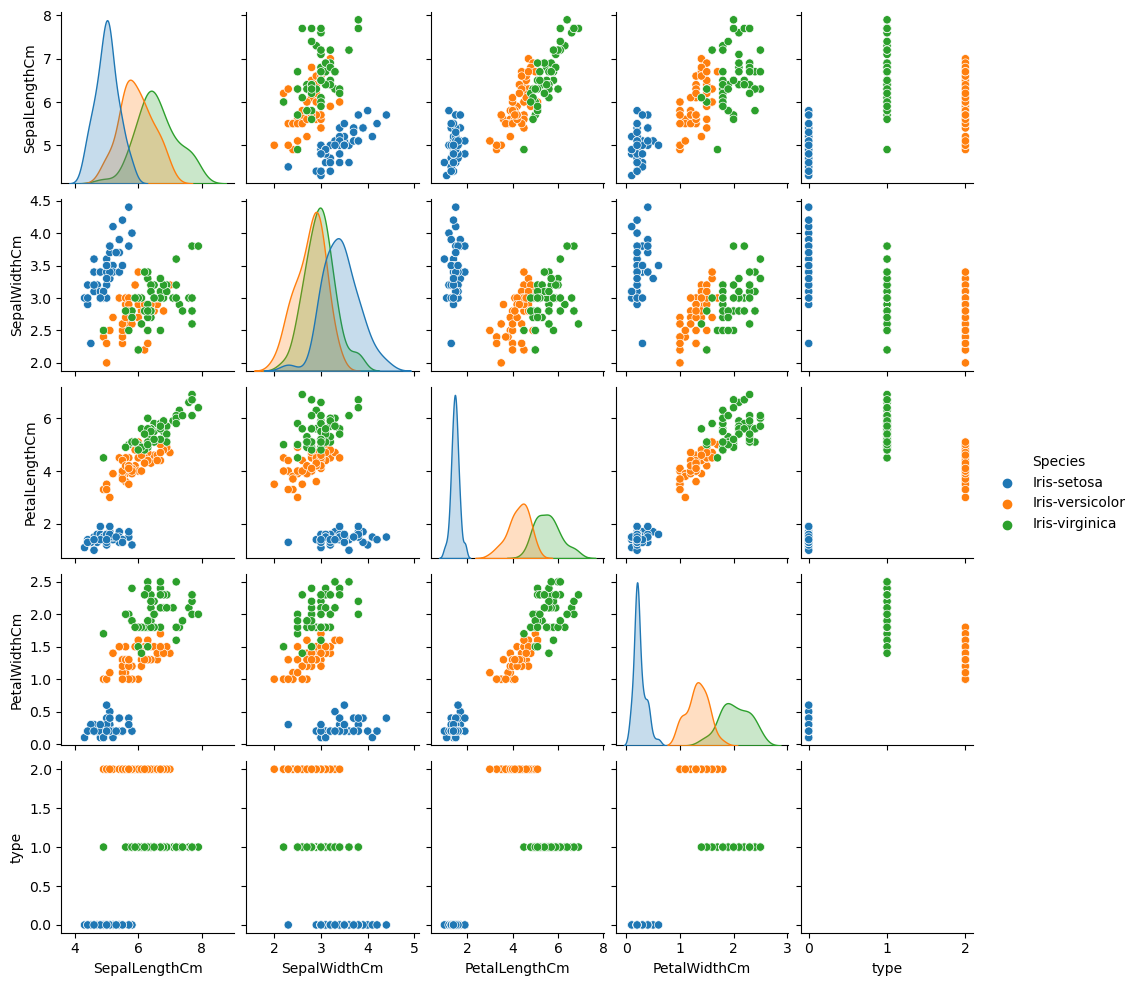

In [51]:
sns.pairplot(iris_df.drop(['Id'], axis = 1),  
             hue='Species', height=2)

Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species

Heat map to analyze the dataset as colors in 2D

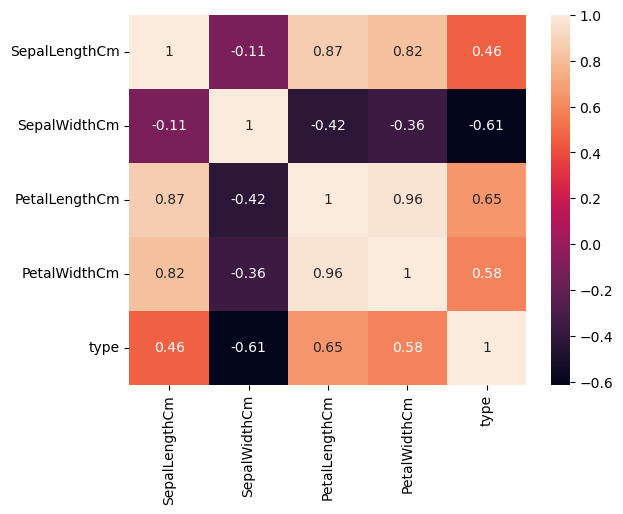

In [52]:
sns.heatmap(iris_df.corr(method='pearson').drop( 
  ['Id'], axis=1).drop(['Id'], axis=0), 
            annot = True); 
  
plt.show()

- Petal width and petal length have high correlations. 
- Petal length and sepal width have good correlations.
- Petal Width and Sepal length have good correlations.

In [54]:
X = iris_df.iloc[:,[1, 2,3, 4]].values
y = iris_df.iloc[:,6].values

X = X.reshape(-1, 4)
X = preprocessing.scale(X) #scale the data so that it is easier to fit

X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=4)



In [55]:
X.shape

(150, 4)

In [56]:
y.shape

(150,)

In [57]:
# fit a model
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train, y_train)

# make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

In [59]:
# Evaluate the model's accuracy and score method to get accuracy of model
from sklearn.metrics import accuracy_score, precision_score
score = log_reg.score(X_test, y_test)


print('Accuracy: {}'.format(score))
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315
Accuracy: 0.9473684210526315


In [63]:
from sklearn.metrics import f1_score, precision_score, recall_score

# average f1 score
av_f1 = f1_score(y_test, y_pred, average='micro')
print(av_f1)

# f1 score per class
classes = list(iri_df.columns)
f = f1_score(y_test, y_pred, average=None)
lowest_score = min(f)
hardest_class = classes[list(f).index(lowest_score)]
print('Hardest class:', hardest_class)

0.9473684210526315
Hardest class: SepalWidthCm


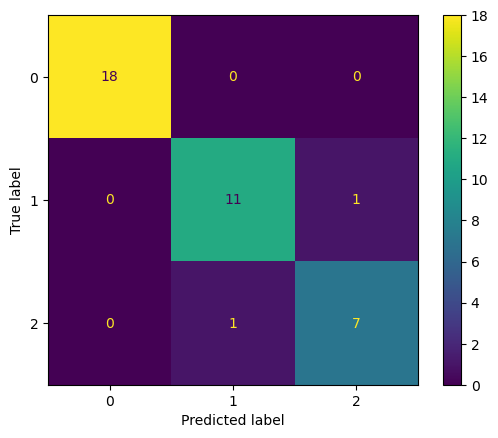

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=None)
disp.plot()